# <font color='dark'>**Detecção de texto em placas de carro**</h1>

# <font color='dark'>**Aula 4**</h1>

### Importação das bibliotecas

In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

### Leitura da imagem

In [31]:
img_names = ['trecho_livro', 'placa_carro1', 'placa_carro2', 'placa_carro3']

In [3]:
img = cv2.imread(f'./data/{img_names[1]}.png')

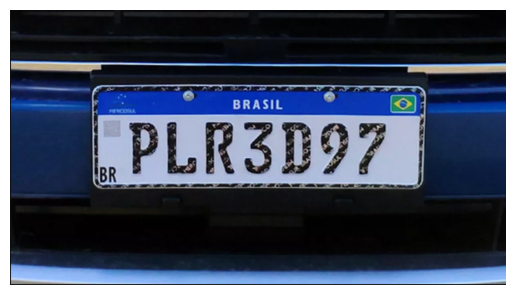

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

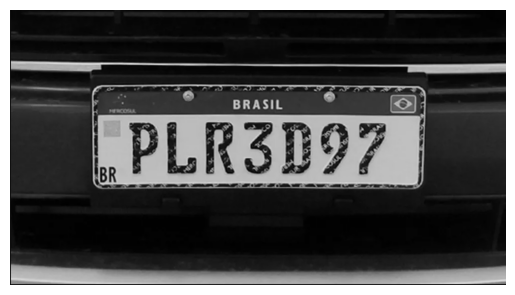

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Detecção de placa

Podemos detectar as bordas das imagens com o uso do método `Canny()`, através das bordas é possível encontrar a localização da placa, através dos contornos fechados em forma retangular.

- [Documentação OpenCV: Detector de bordas de Canny](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)

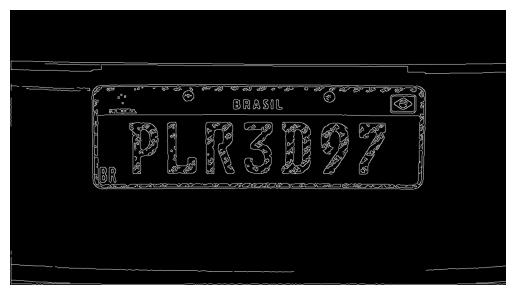

In [7]:
border = cv2.Canny(img, 100, 200)

plt.imshow(cv2.cvtColor(border, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Para detectar os contornos das placas, podemos usar o método `findContours()`.

- [Documentação OpenCV: Contornos](https://docs.opencv.org/4.x/d3/d05/tutorial_py_table_of_contents_contours.html)

In [8]:
contours, hierarchy = cv2.findContours(border, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
contours

(array([[[1069,  593]],
 
        [[1068,  594]],
 
        [[1057,  594]],
 
        [[1056,  595]],
 
        [[1045,  595]],
 
        [[1044,  596]],
 
        [[1018,  596]],
 
        [[1044,  596]],
 
        [[1045,  595]],
 
        [[1056,  595]],
 
        [[1057,  594]],
 
        [[1068,  594]],
 
        [[1069,  593]],
 
        [[1082,  593]]], dtype=int32),
 array([[[490, 571]],
 
        [[489, 572]],
 
        [[490, 571]],
 
        [[517, 571]],
 
        [[518, 572]],
 
        [[519, 572]],
 
        [[520, 571]],
 
        [[548, 571]],
 
        [[549, 572]],
 
        [[553, 572]],
 
        [[554, 571]],
 
        [[565, 571]],
 
        [[566, 572]],
 
        [[568, 572]],
 
        [[569, 571]],
 
        [[570, 572]],
 
        [[572, 572]],
 
        [[573, 571]],
 
        [[576, 571]],
 
        [[577, 572]],
 
        [[587, 572]],
 
        [[588, 571]],
 
        [[590, 571]],
 
        [[591, 572]],
 
        [[601, 572]],
 
        [[602, 571]],
 

In [10]:
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approximation = cv2.approxPolyDP(contour, epsilon, True)
    if cv2.isContourConvex(approximation) and len(approximation) == 4:
        location = approximation
        break

In [11]:
location

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

In [12]:
x, y, w, h = cv2.boundingRect(location)
x, y, w, h

(180, 168, 722, 224)

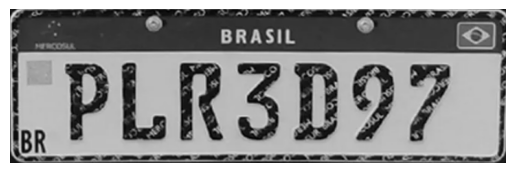

In [13]:
plate = img[y:y+h, x:x+w]

plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

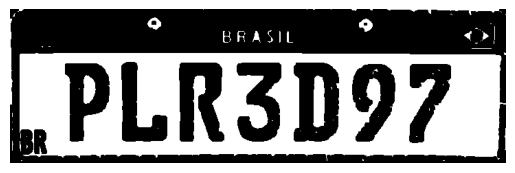

In [14]:
valor, lim_otsu = cv2.threshold(plate, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
otsu_erode_img = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4,4)))

plt.imshow(cv2.cvtColor(otsu_erode_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [15]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(otsu_erode_img, lang='por', config=config_tesseract)
print(text)

L PLR3D97



In [16]:
import re
extracted_text = re.search('\w{3}\d{1}\w{1}\d{2}', text)
extracted_text

<re.Match object; span=(2, 9), match='PLR3D97'>

In [17]:
print(extracted_text.group(0))

PLR3D97


#### Aplicação em outro cenário

In [33]:
img = cv2.imread(f'./data/{img_names[2]}.jpg')

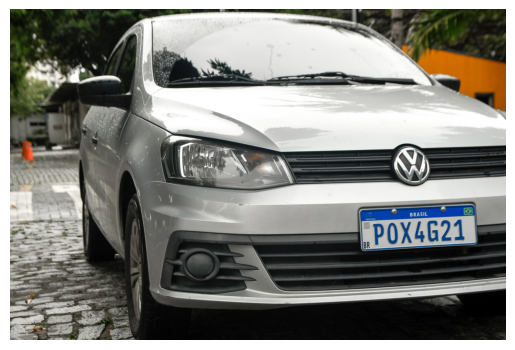

In [34]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [35]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

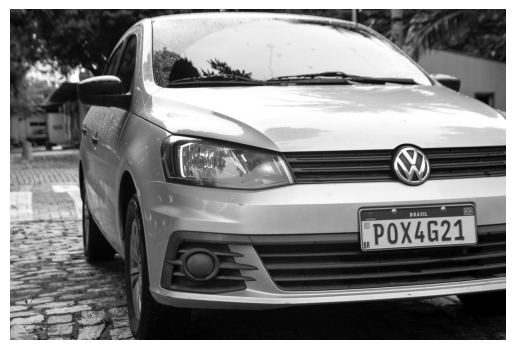

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

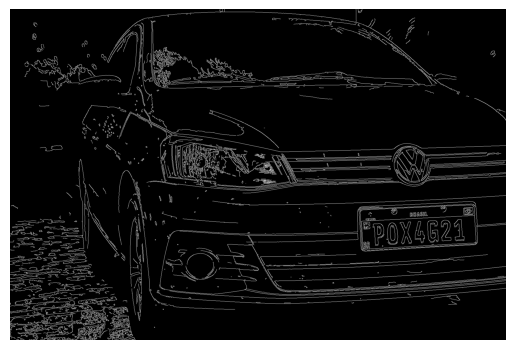

In [37]:
border = cv2.Canny(img, 100, 200)

plt.imshow(cv2.cvtColor(border, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [38]:
contours, hierarchy = cv2.findContours(border, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse=True)[:10]

In [39]:
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approximation = cv2.approxPolyDP(contour, epsilon, True)
    if cv2.isContourConvex(approximation) and len(approximation) == 4:
        location = approximation
        break

In [40]:
location

array([[[1659,  737]],

       [[1656,  835]],

       [[1260,  850]],

       [[1259,  756]]], dtype=int32)

In [41]:
x, y, w, h = cv2.boundingRect(location)
x, y, w, h

(1259, 737, 401, 114)

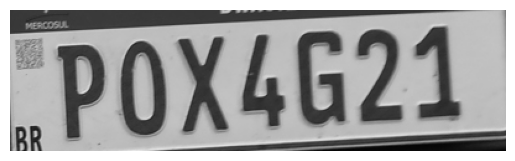

In [42]:
plate = img[y:y+h, x:x+w]

plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

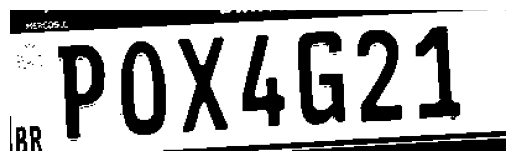

In [43]:
value, lim_otsu = cv2.threshold(plate, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(cv2.cvtColor(lim_otsu, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [44]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(text)

“POX4G21



In [45]:
extracted_text = re.search('\w{3}\d{1}\w{1}\d{2}', text)
extracted_text

<re.Match object; span=(1, 8), match='POX4G21'>

In [46]:
print(extracted_text.group(0))

POX4G21
